# Introduction

This project will investigate if there is a strong correlation between the economic output of a country and the life expectancy of its citizens.

The goals are to prepare data, followed by analysis with plots, and seek to explain the findings from the study.

Here are a few questions that this project will seek to answer:

+ Has life expectancy increased over time in the six nations?
+ Has GDP increased over time in the six nations?
+ Is there a correlation between GDP and life expectancy of a country?
+ What is the average life expectancy in these nations?
+ What is the distribution of that life expectancy?

**Data sources**

- GDP Source: [World Bank](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD) national accounts data, and OECD National Accounts data files.

- Life expectancy Data Source: [World Health Organization](http://apps.who.int/gho/data/node.main.688)


## Import python libraries
first we import python libraries we use in this project, including:

* `numpy`
* `pandas`
* `matplotlib.pyplot`
* `seaborn`

In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

In [72]:
df = pd.read_csv('all_data.csv')
df.head(10)

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
5,Chile,2005,78.4,1.229650e+11
6,Chile,2006,78.9,1.547880e+11
7,Chile,2007,78.9,1.736060e+11
8,Chile,2008,79.6,1.796380e+11
9,Chile,2009,79.3,1.723890e+11


# Explore data

In the first step, we should explore the data to see if the data is clean, check missing values and unexpected results

In [73]:
# get a general information of the data using .info, .unique, .isnull

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [74]:
df.isnull().sum()

Country                             0
Year                                0
Life expectancy at birth (years)    0
GDP                                 0
dtype: int64

In [75]:
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [76]:
df.Year.unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

It seems that we've got a clean data with no null value. Then let's check the descriptive stattistics of numerical values:

* Life expectancy at birth (years)
* GDP

We can use .describe() and histgram to check these data

In [77]:
df['Life expectancy at birth (years)'].describe()

count    96.000000
mean     72.789583
std      10.672882
min      44.300000
25%      74.475000
50%      76.750000
75%      78.900000
max      81.000000
Name: Life expectancy at birth (years), dtype: float64

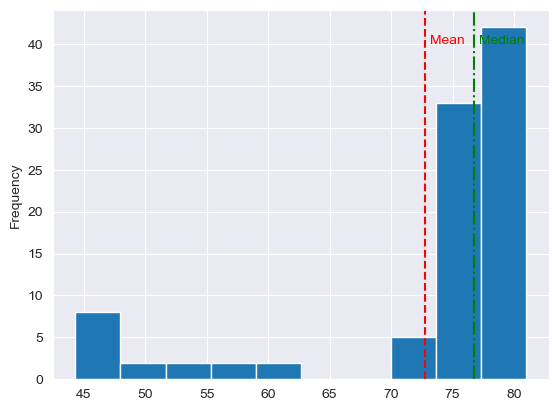

In [78]:
df['Life expectancy at birth (years)'].plot.hist()
plt.axvline(x = df['Life expectancy at birth (years)'].mean(), color = 'r', linestyle = '--')
plt.axvline(x = df['Life expectancy at birth (years)'].median(), color = 'g', linestyle = '-.')
plt.text(x = df['Life expectancy at birth (years)'].mean() +0.4 , y =40, s = 'Mean', color = 'r')
plt.text(x = df['Life expectancy at birth (years)'].median() +0.4 , y =40, s = 'Median', color = 'g')
plt.show()

We can see that the distribution of Life expectancy is left-skewed, with the average life expectancies of most countries over 70s, while some countries have extremely low life expectancies between 44 and 63.

In [79]:
df.GDP.describe()

count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64

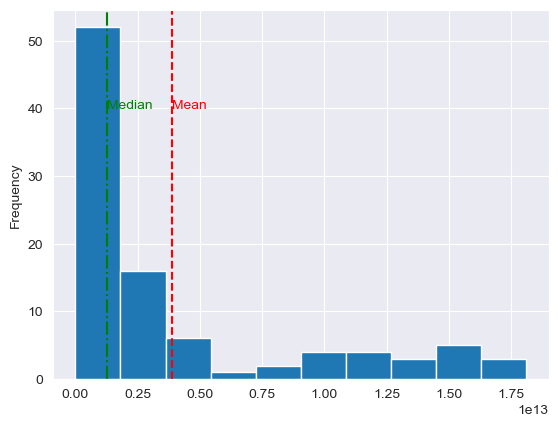

In [80]:
df.GDP.plot.hist()
plt.axvline(x = df.GDP.mean(), color = 'r', linestyle = '--')
plt.axvline(x = df.GDP.median(), color = 'g', linestyle = '-.')
plt.text(x = df.GDP.mean() +0.4 , y =40, s = 'Mean', color = 'r')
plt.text(x = df.GDP.median() +0.4 , y =40, s = 'Median', color = 'g')
plt.show()

The distribution of GDP, on the other hand, is right skewed.

There is no obvious outliers in both numerical features.

In [81]:
#we also want to check the number of unique countries to have a better understanding of data
df.Country.unique()

array(['Chile', 'China', 'Germany', 'Mexico', 'United States of America',
       'Zimbabwe'], dtype=object)

In [82]:
df.Country.value_counts()

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64

In [83]:
df.Year.value_counts()

2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64

In this case, we can even transform this data to a wide table:

In [84]:
df_wide_GDP = pd.pivot_table(data = df, index = 'Year', columns = 'Country', values = 'GDP')
df_wide_life = pd.pivot_table(data = df, index = 'Year', columns = 'Country', values = 'Life expectancy at birth (years)')
display(df_wide_GDP)
display(df_wide_life)

Country,Chile,China,Germany,Mexico,United States of America,Zimbabwe
Year,,,,,,
2000,7.786093e+10,1.211350e+12,1.949950e+12,6.836480e+11,1.030000e+13,6.689958e+09
2001,7.097992e+10,1.339400e+12,1.950650e+12,7.247040e+11,1.060000e+13,6.777385e+09
2002,6.973681e+10,1.470550e+12,2.079140e+12,7.415600e+11,1.100000e+13,6.342116e+09
2003,7.564346e+10,1.660290e+12,2.505730e+12,7.132840e+11,1.150000e+13,5.727592e+09
2004,9.921039e+10,1.955350e+12,2.819250e+12,7.702680e+11,1.230000e+13,5.805598e+09
2005,1.229650e+11,2.285970e+12,2.861410e+12,8.663460e+11,1.310000e+13,5.755215e+09
2006,1.547880e+11,2.752130e+12,3.002450e+12,9.652810e+11,1.390000e+13,5.443896e+09
2007,1.736060e+11,3.552180e+12,3.439950e+12,1.043470e+12,1.450000e+13,5.291950e+09
2008,1.796380e+11,4.598210e+12,3.752370e+12,1.101280e+12,1.470000e+13,4.415703e+09


Country,Chile,China,Germany,Mexico,United States of America,Zimbabwe
Year,,,,,,
2000,77.3,71.7,78.0,74.8,76.8,46.0
2001,77.3,72.2,78.3,75.0,76.9,45.3
2002,77.8,72.7,78.4,75.0,77.0,44.8
2003,77.9,73.1,78.5,75.0,77.2,44.5
2004,78.0,73.5,79.1,75.4,77.5,44.3
2005,78.4,73.9,79.2,75.3,77.5,44.6
2006,78.9,74.2,79.6,75.8,77.8,45.4
2007,78.9,74.4,79.8,76.0,78.1,46.6
2008,79.6,74.5,79.9,75.6,78.2,48.2


We may use a heatmap to visualize this data:

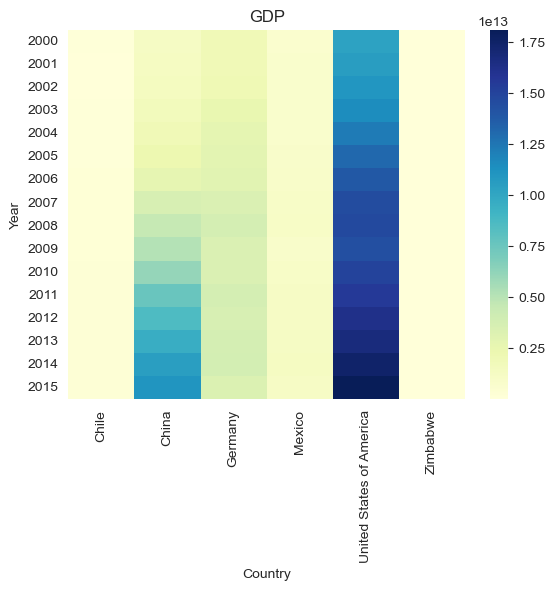

In [98]:
sns.heatmap(df_wide_GDP,cmap="YlGnBu")
plt.title('GDP')
plt.show()

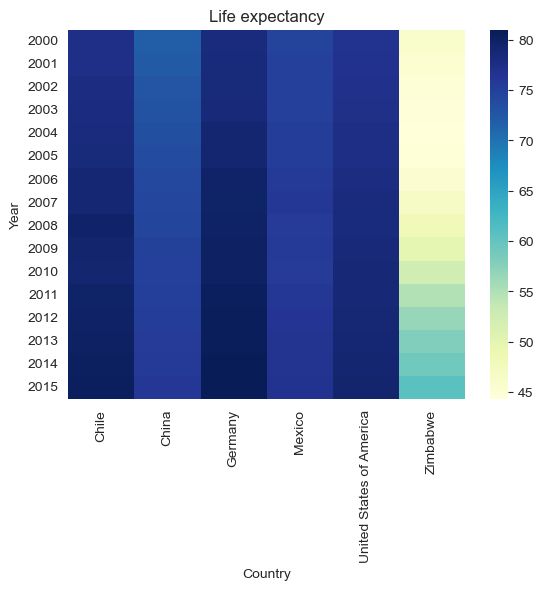

In [99]:
sns.heatmap(df_wide_life,cmap="YlGnBu")
plt.title('Life expectancy')
plt.show()

##  Bivariate analysis
Now we want to visualize the relationship between two variables and do statistical test using
* `scipy.stats`
* `statsmodels`
* `pingouin`

In [87]:
import scipy.stats as stats
import statsmodels.formula.api as smf
import pingouin as pg

We first check the relationship between two numerical variables: GDP and life expectancy

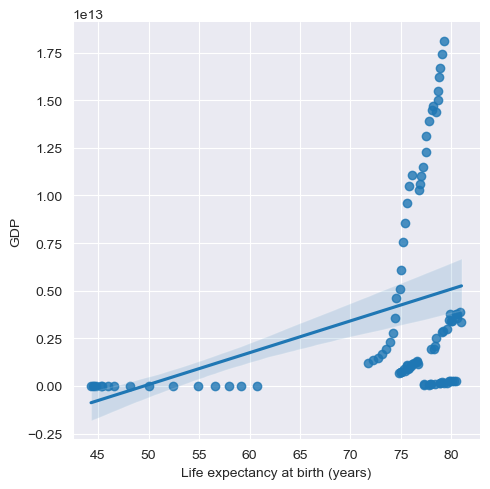

In [88]:
sns.set_style('darkgrid')

sns.lmplot(data = df, x  = 'Life expectancy at birth (years)' , y = 'GDP')
plt.show()

We see a clusting pattern here, so we want to further group them by countries:

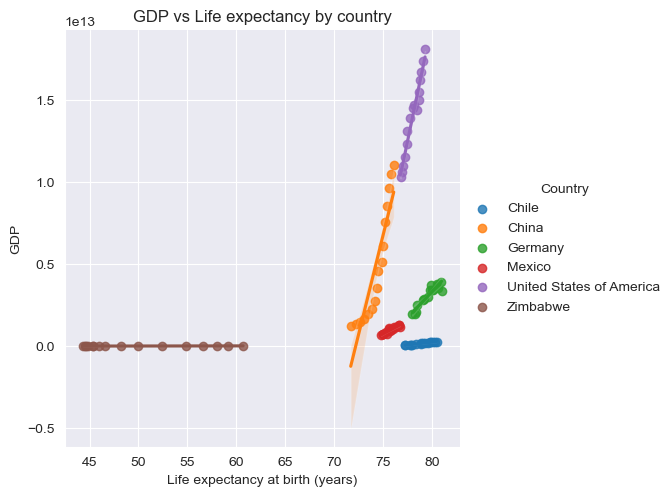

In [100]:
sns.lmplot(data = df, x  = 'Life expectancy at birth (years)' , y = 'GDP', hue = 'Country')
plt.title('GDP vs Life expectancy by country')
plt.show()

In [90]:
df2 = df.rename(columns={"Life expectancy at birth (years)":"Life_expectancy_at_birth_years"})
country_list = df.Country.unique()
# we use a for loop to calculate linear regression for each country using statsmodels
for c in country_list:
    dft = df2[df.Country == c]
    md = smf.ols('GDP ~ Life_expectancy_at_birth_years',data = dft).fit()
    print(f"the linear parameter for {c} is {md.params}")


the linear parameter for Chile is Intercept                        -5.274392e+12
Life_expectancy_at_birth_years    6.896278e+10
dtype: float64
the linear parameter for China is Intercept                        -1.742637e+14
Life_expectancy_at_birth_years    2.413350e+12
dtype: float64
the linear parameter for Germany is Intercept                        -4.776788e+13
Life_expectancy_at_birth_years    6.385269e+11
dtype: float64
the linear parameter for Mexico is Intercept                        -2.284545e+13
Life_expectancy_at_birth_years    3.146130e+11
dtype: float64
the linear parameter for United States of America is Intercept                        -2.098456e+14
Life_expectancy_at_birth_years    2.868478e+12
dtype: float64
the linear parameter for Zimbabwe is Intercept                        -2.595927e+10
Life_expectancy_at_birth_years    6.991261e+08
dtype: float64


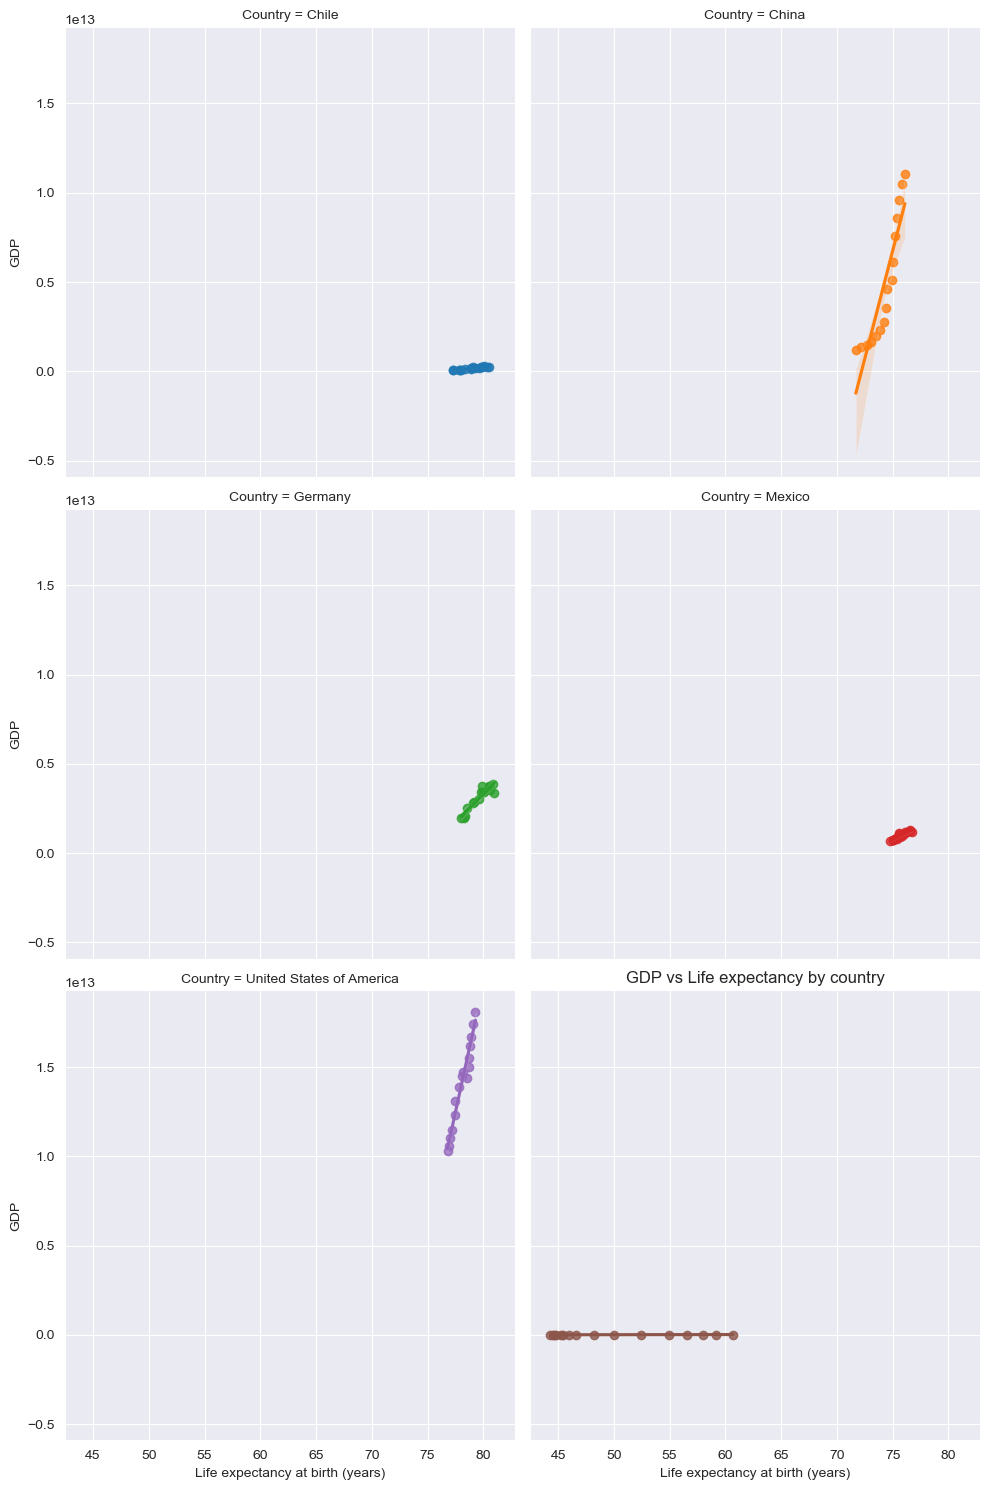

In [109]:
sns.lmplot(data = df, x  = 'Life expectancy at birth (years)' , y = 'GDP', hue = 'Country', col = 'Country', col_wrap = 2)
plt.title('GDP vs Life expectancy by country')
plt.show()

For China, a ordered relationship can be seen:

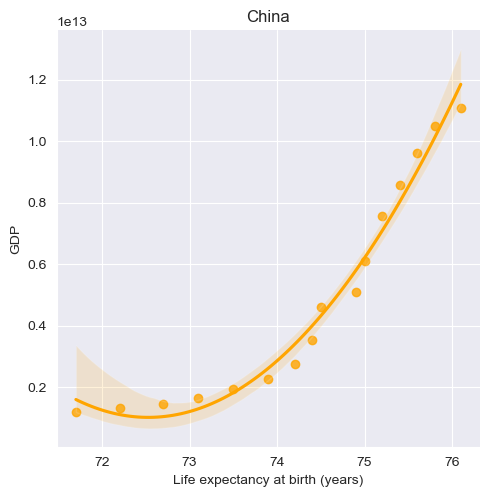

In [118]:
sns.lmplot(data = df[df.Country == 'China'], x  = 'Life expectancy at birth (years)' , y = 'GDP', order = 2, line_kws = {'color':'orange'},scatter_kws = {'color':'orange'})
plt.title('China')
plt.show()

In the next step, we want to check the change of two numerical variables(GDP and life expectancies) over time by countries.

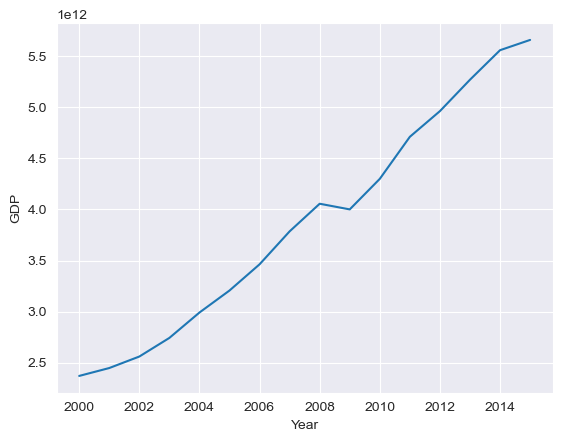

In [94]:
# We first check the overall trend of GDP over years
sns.lineplot(data = df, x = 'Year', y = 'GDP',ci = None)
plt.show()

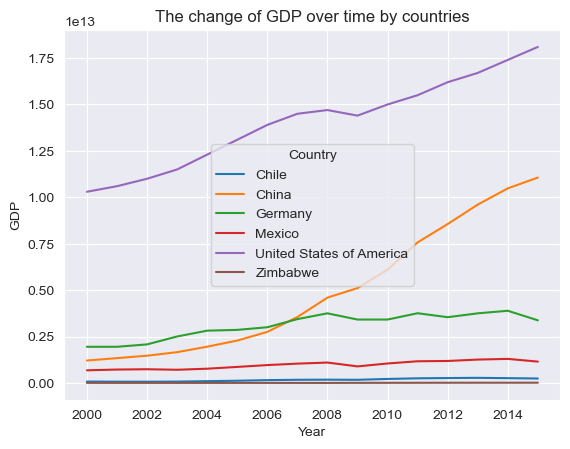

In [101]:
# Then we ckeck the same data by countries:
sns.lineplot(data = df, x = 'Year', y = 'GDP',ci = None, hue = 'Country')
plt.title('The change of GDP over time by countries')
plt.show()

We do the same analysis for Life expectancies

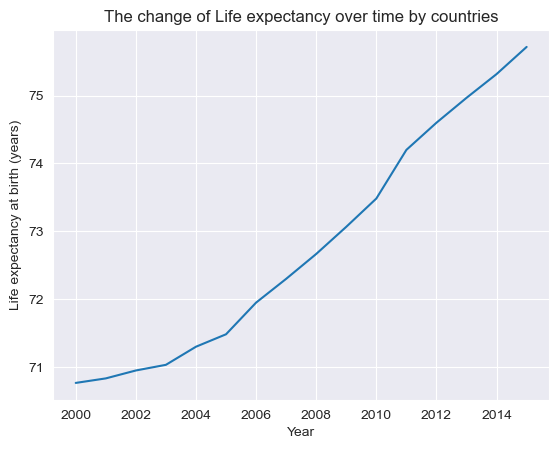

In [102]:
sns.lineplot(data = df, x = 'Year', y = 'Life expectancy at birth (years)',ci = None)
plt.title('The change of Life expectancy over time by countries')
plt.show()

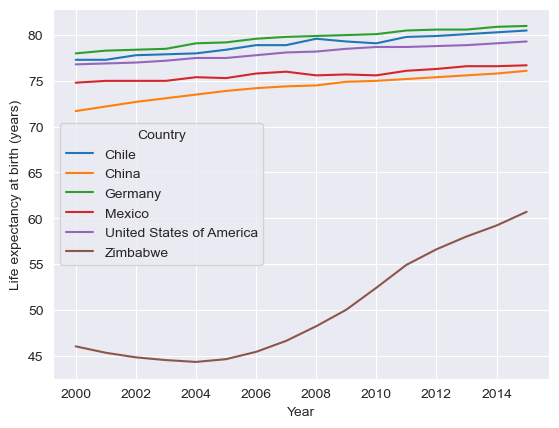

In [97]:
sns.lineplot(data = df, x = 'Year', y = 'Life expectancy at birth (years)',ci = None, hue = 'Country')
plt.show()

We can also put countries in different ficetgrids to have a better view:

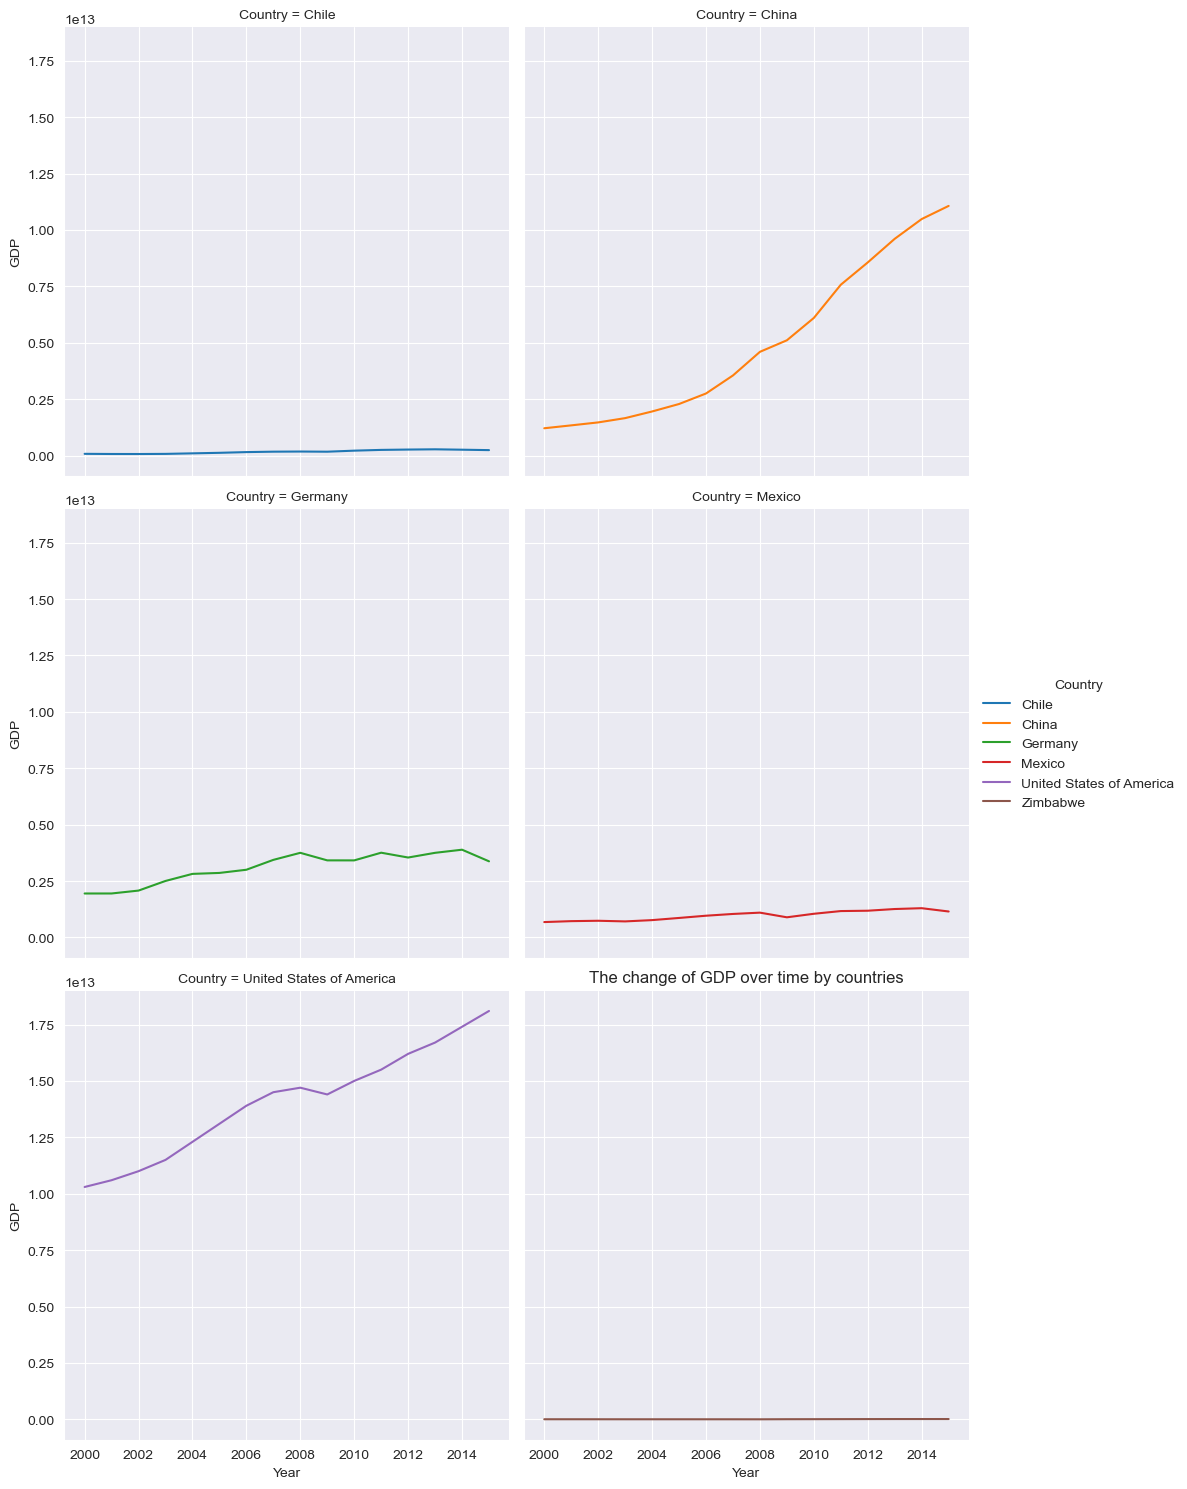

In [104]:
sns.relplot(data = df, x = 'Year', y = 'GDP',ci = None, hue = 'Country',col = 'Country', kind = 'line',col_wrap = 2)
plt.title('The change of GDP over time by countries')
plt.show()

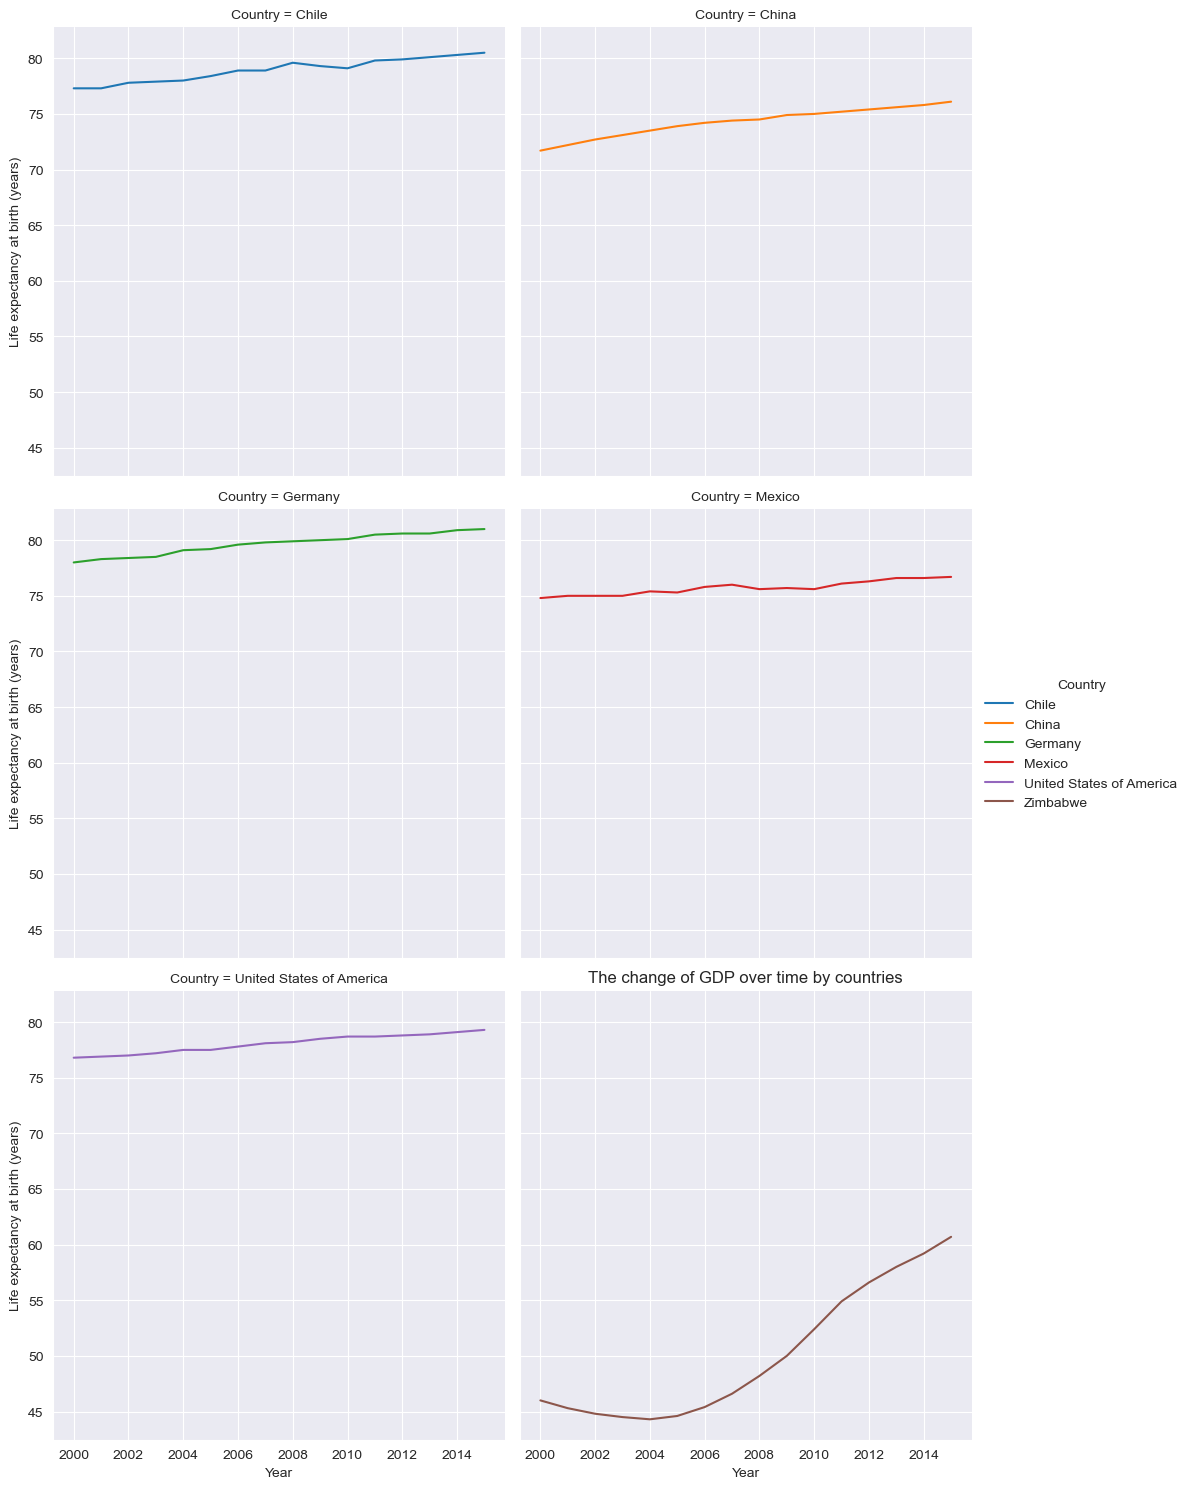

In [105]:
sns.relplot(data = df, x = 'Year', y = 'Life expectancy at birth (years)',ci = None, hue = 'Country',col = 'Country', kind = 'line',col_wrap = 2)
plt.title('The change of GDP over time by countries')
plt.show()

Now let's compare two numerical variables: GPD and Life expectancies, between countries.

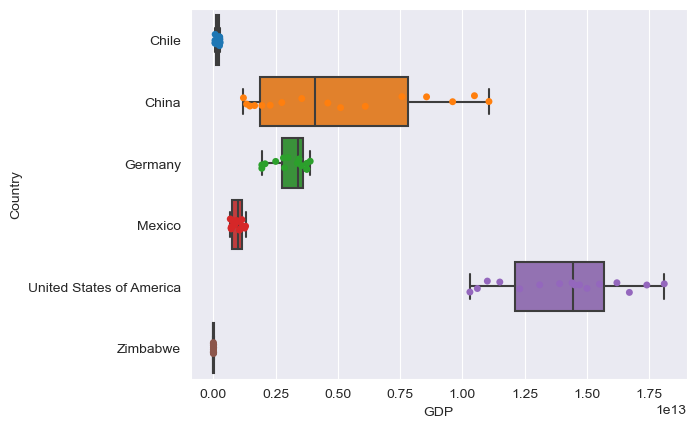

In [121]:
sns.boxplot(data = df, x = 'GDP', y = 'Country')
sns.stripplot(data = df, x = 'GDP', y = 'Country')
plt.show()

using a boxplot combined with stripplot. we see the difference of GDP between countries. To see if the difference is significantly different, we can use `pingouin` to do ANOVA and t test between groups

In [133]:
alpha = 0.05

pg.anova(data = df, dv = 'GDP', between = 'Country')['p-unc'] < alpha

0    True
Name: p-unc, dtype: bool

In [134]:
ttest = pg.pairwise_tests(data = df, dv = 'GDP', between = 'Country')
ttest['significant'] = (ttest['p-unc'] < alpha)
ttest

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges,significant
0,Country,Chile,China,False,True,-5.468883,30.0,two-sided,6.199316e-06,2366.027,-1.884797,True
1,Country,Chile,Germany,False,True,-17.413253,30.0,two-sided,3.124209e-17,8.734e+13,-6.001308,True
2,Country,Chile,Mexico,False,True,-14.458091,30.0,two-sided,4.643151e-15,7.341e+11,-4.982840,True
3,Country,Chile,United States of America,False,True,-22.852480,30.0,two-sided,1.570592e-20,1.278e+17,-7.875885,True
4,Country,Chile,Zimbabwe,False,True,8.349535,30.0,two-sided,2.554110e-09,2.828e+06,2.877586,True
5,Country,China,Germany,False,True,2.090748,30.0,two-sided,4.512378e-02,1.691,0.720556,True
6,Country,China,Mexico,False,True,4.540236,30.0,two-sided,8.503905e-05,242.688,1.564748,True
7,Country,China,United States of America,False,True,-8.554219,30.0,two-sided,1.521190e-09,4.577e+06,-2.948128,True
8,Country,China,Zimbabwe,False,True,5.653827,30.0,two-sided,3.681910e-06,3753.122,1.948537,True
9,Country,Germany,Mexico,False,True,12.110269,30.0,two-sided,4.438488e-13,9.616e+09,4.173686,True


So the GDP is different significantly among all countries.

We do the same thing for Life expectancy

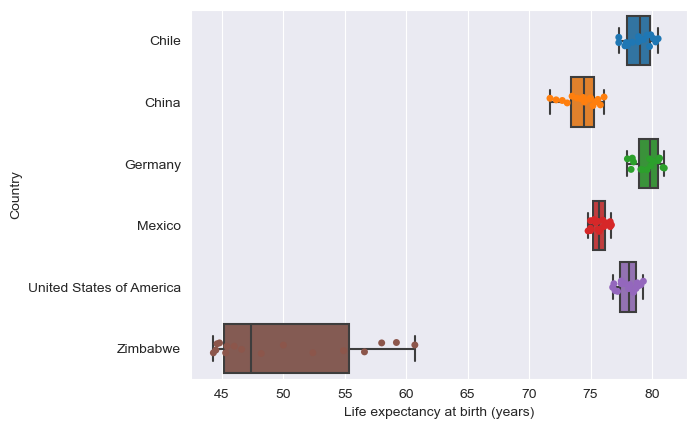

In [136]:
sns.boxplot(data = df, x = 'Life expectancy at birth (years)', y = 'Country')
sns.stripplot(data = df, x = 'Life expectancy at birth (years)', y = 'Country')
plt.show()

In [137]:
alpha = 0.05

pg.anova(data = df, dv = 'Life expectancy at birth (years)', between = 'Country')['p-unc'] < alpha

0    True
Name: p-unc, dtype: bool

In [138]:
ttest = pg.pairwise_tests(data = df, dv = 'Life expectancy at birth (years)', between = 'Country')
ttest['significant'] = (ttest['p-unc'] < alpha)
ttest

,Contrast,A,B,Paired,Parametric,T,dof,alternative,p-unc,BF10,hedges,significant
0,Country,Chile,China,False,True,11.075310,30.0,two-sided,4.025711e-12,1.194e+09,3.816998,True
1,Country,Chile,Germany,False,True,-1.979970,30.0,two-sided,5.694448e-02,1.441,-0.682378,False
2,Country,Chile,Mexico,False,True,10.508606,30.0,two-sided,1.423030e-11,3.631e+08,3.621689,True
3,Country,Chile,United States of America,False,True,2.616891,30.0,two-sided,1.376495e-02,3.984,0.901886,True
4,Country,Chile,Zimbabwe,False,True,19.125109,30.0,two-sided,2.349368e-18,1.042e+15,6.591283,True
5,Country,China,Germany,False,True,-13.159913,30.0,two-sided,5.378097e-14,7.129e+10,-4.535436,True
6,Country,China,Mexico,False,True,-3.997995,30.0,two-sided,3.839555e-04,68.09,-1.377870,True
7,Country,China,United States of America,False,True,-9.750136,30.0,two-sided,8.220610e-11,6.984e+07,-3.360290,True
8,Country,China,Zimbabwe,False,True,15.888022,30.0,two-sided,3.764618e-16,8.076e+12,5.475652,True
9,Country,Germany,Mexico,False,True,13.625006,30.0,two-sided,2.192689e-14,1.674e+11,4.695726,True


 We see that except between Chile and Germany, life expectancies between all the other countries are significant
 
 Let's finally do a jointplot to further check the clusting of data:

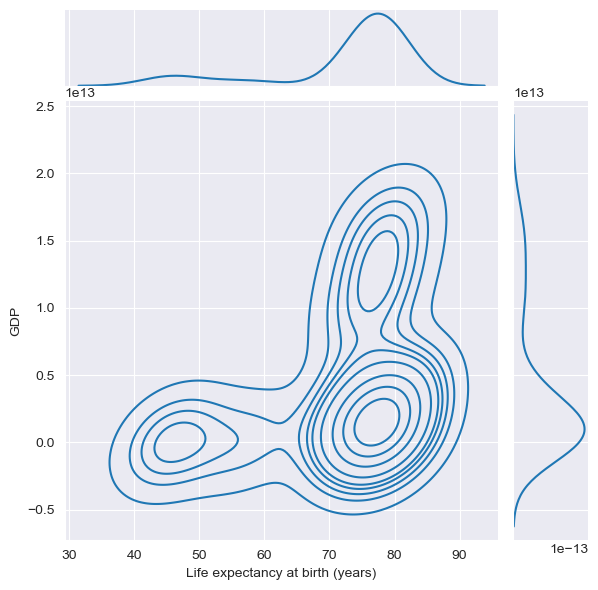

In [142]:
sns.jointplot(data = df, x  = 'Life expectancy at birth (years)' , y = 'GDP',kind = 'kde')
plt.show()